In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def modela(r):
    return np.sqrt(r)

def modelb(r):
    return -1*np.sqrt(r)

In [3]:
xlim = np.linspace(0, 10)
modela_results = [modela(each) for each in xlim]
modelb_results = [modelb(each) for each in xlim]

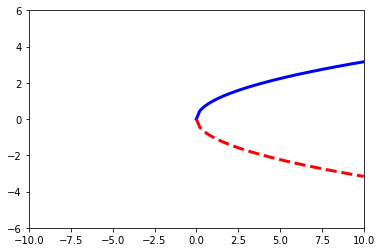

In [4]:
plt.plot(xlim, modela_results, 'b-', linewidth=3)
plt.plot(xlim, modelb_results, 'r--', linewidth=3)
plt.plot([0], [0], [0])
plt.axis([-10, 10, -6, 6])
plt.show()

In [5]:
import numpy as np

In [6]:
A = np.array([[1, 0, -1], 
              [0, 1, 1], 
              [-1, 1, -3]])

In [7]:
eig_A = np.linalg.eig(A)

In [8]:
B = np.array([[1], [1], [1]])
A @ A @ A @ B

array([[ -8],
       [ 10],
       [-37]])

In [9]:
eig_A[0]

array([-3.44948974,  1.        ,  1.44948974])

In [10]:
eig_A

(array([-3.44948974,  1.        ,  1.44948974]),
 array([[ 2.14186495e-01, -7.07106781e-01, -6.73887339e-01],
        [-2.14186495e-01, -7.07106781e-01,  6.73887339e-01],
        [ 9.53020614e-01,  1.33504240e-17,  3.02905447e-01]]))

In [11]:
D = np.array([[1.], [0.], [0.]])
C = np.linalg.matrix_power(A, 1000)
np.matmul(C, D)

array([[ 6.19610576e+18],
       [-6.19610576e+18],
       [ 4.68751787e+18]])

In [12]:
#Dominant eigenvector is int he same direction as the product.

Focus around the eq point of a non-linear system, you can use the linear methods 
to approx the behavior of the system.

In [18]:
from sympy import *
init_printing()

In [19]:
x, a, s, n, r_a, r_s = symbols('x a s n r_a r_s')

In [23]:
nx = x + a * (1/n) * (1-s) - x
na = a - x * a + r_a *s -a
ns = s + r_s * s * (1-s) - s

In [24]:
solve([nx, na, ns], [x, a, s])

In [27]:
#Zoom in at each eq. point. 
# Jacobian Matrix

F1 = x + a * (1/n) * (1-s)
F2 = a - x * a + r_a *s
F3 = s + r_s * s * (1-s)

In [34]:
#First row of Jacobian matrix
J = Matrix([
    
    [F1.diff(x), F1.diff(a), F1.diff(s)],
    [F2.diff(x), F2.diff(a), F2.diff(s)],
    [F3.diff(x), F3.diff(a), F3.diff(s)]
])    

In [35]:
# Jacobian Matrix #24:29 
# Linear approx of non linear function
J

⎡    1 - s           -a           ⎤
⎢1   ─────           ───          ⎥
⎢      n              n           ⎥
⎢                                 ⎥
⎢-a  1 - x            rₐ          ⎥
⎢                                 ⎥
⎣0     0    -rₛ⋅s + rₛ⋅(1 - s) + 1⎦

In [39]:
# Finding eq point of Jacobian Matrix
# This is the matrix assuming that you 
# linearize non-linear system, 
# around eq. point.
J0 = J.subs([(a, 0), (s, 0)])

In [41]:
J0.eigenvals()
# Since matrix is Upper/Lower Triangular, 
# eigenvalues are the values on the diag.

In [42]:
J0

⎡     1          ⎤
⎢1    ─      0   ⎥
⎢     n          ⎥
⎢                ⎥
⎢0  1 - x    rₐ  ⎥
⎢                ⎥
⎣0    0    rₛ + 1⎦

In [44]:
J0.eigenvects()

⎡                                    ⎛           ⎡⎡      rₐ      ⎤⎤⎞⎤
⎢                                    ⎜           ⎢⎢──────────────⎥⎥⎟⎥
⎢               ⎛          ⎡⎡-1 ⎤⎤⎞  ⎜           ⎢⎢    2         ⎥⎥⎟⎥
⎢⎛      ⎡⎡1⎤⎤⎞  ⎜          ⎢⎢───⎥⎥⎟  ⎜           ⎢⎢n⋅rₛ  + n⋅rₛ⋅x⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜          ⎢⎢n⋅x⎥⎥⎟  ⎜           ⎢⎢              ⎥⎥⎟⎥
⎢⎜1, 1, ⎢⎢0⎥⎥⎟, ⎜1 - x, 1, ⎢⎢   ⎥⎥⎟, ⎜rₛ + 1, 1, ⎢⎢     -rₐ      ⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜          ⎢⎢ 1 ⎥⎥⎟  ⎜           ⎢⎢   ───────    ⎥⎥⎟⎥
⎢⎝      ⎣⎣0⎦⎦⎠  ⎜          ⎢⎢   ⎥⎥⎟  ⎜           ⎢⎢   -rₛ - x    ⎥⎥⎟⎥
⎢               ⎝          ⎣⎣ 0 ⎦⎦⎠  ⎜           ⎢⎢              ⎥⎥⎟⎥
⎣                                    ⎝           ⎣⎣      1       ⎦⎦⎠⎦

In [45]:
#First point is always unstable. 
# 30:30
J1.eigenvects()

NameError: name 'J1' is not defined

In [49]:
A = np.array([[0, 0], [0, -1]])
np.linalg.eig(A)

(array([ 0., -1.]),
 array([[1., 0.],
        [0., 1.]]))

In [50]:
1 + np.sqrt(2)

In [51]:
1 - np.sqrt(2)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
#Exercise 5.4

def modelb(xinit, yinit, itr):
    
    xresults = [xinit]
    yresults = [yinit]
    

    
    for each in range(0, itr):
        lastx = xresults[-1]
        lasty = yresults[-1]

        nextx = 0.5 * lastx + lasty
        nexty = -0.5 * lastx + lasty
        
        xresults.append(nextx)
        yresults.append(nexty)

    results = {}
    
    results['yresults'] = yresults
    results['xresults'] = xresults
    
    return results

In [49]:
def plot(lower_lim, upper_lim, step, model, itr, prob):
    
    param_space = np.arange(lower_lim, upper_lim, step)
    param_list = []
    for each_a in param_space:
        for each_b in param_space:
            param_list.append({'param_a': each_a, 'param_b':each_b})

    plt.figure(figsize=(15, 5))     
    for i in range(len(param_list)):
        run1 = model(xinit=float(param_list[i]['param_a']), 
                     yinit=float(param_list[i]['param_b']), 
                     itr=itr)

        plt.plot(run1['xresults'], run1['yresults'])
        plt.xlabel('X-Values')
        plt.ylabel('Y-Values')
    plt.title(prob)
    plt.show()

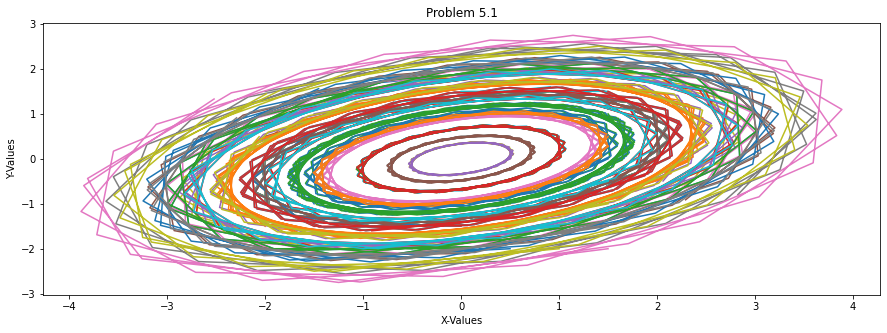

In [50]:
plot(lower_lim=-2.0, upper_lim=2.0, step=0.5, model=modela, itr=30, prob='Problem 5.1')

In [64]:
#Exercise 5.4

def modelb(xinit, yinit, itr):
    
    xresults = [xinit]
    yresults = [yinit]
    
    for each in range(0, itr):
        lastx = xresults[-1]
        lasty = yresults[-1]
        
        product = lastx * lasty

        nextx = lastx + 0.1 * (lastx - product)
        nexty = lasty + 0.1 * (lasty - product)
        
        xresults.append(nextx)
        yresults.append(nexty)

    results = {}
    
    results['yresults'] = yresults
    results['xresults'] = xresults
    
    return results

In [86]:
def plot2(lower_lim, upper_lim, step, model, itr, prob_num):
    
    param_space = np.arange(lower_lim, upper_lim, step)
    param_list = []
    for each_a in param_space:
        for each_b in param_space:
            param_list.append({'param_a': each_a, 'param_b':each_b})

    plt.figure(figsize=(15, 5))     
    for i in range(len(param_list)):
        
        run1 = model(xinit=float(param_list[i]['param_a']), 
                     yinit=float(param_list[i]['param_b']), 
                     itr=itr)

        plt.plot(run1['xresults'], run1['yresults'])
        plt.xlabel('X-Values')
        plt.ylabel('Y-Values')
        
    plt.title(prob_num)
    plt.show()

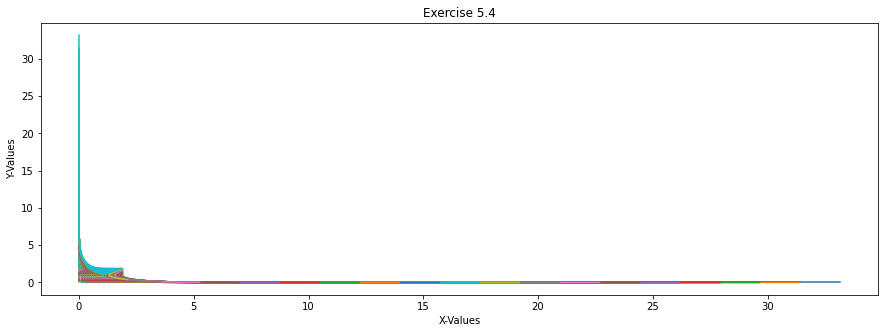

In [101]:
plot2(lower_lim=0, upper_lim=2.0, step=0.1, model=modelb, itr=30, prob_num='Exercise 5.4')

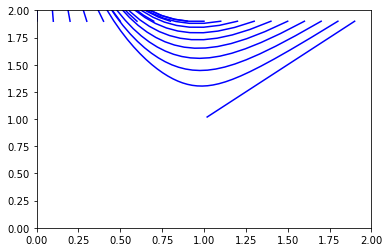

In [100]:
from pylab import *

def initialize(x0, y0):
    global x, y, xresult, yresult
    x = x0
    y = y0
    xresult = [x]
    yresult = [y]
    
def observe():
    global x, y, xresult, yresult
    xresult.append(x)
    yresult.append(y)
    
def update():
    global x, y, xresult, yresult
    nextx = x + 0.1 * (x - x * y)
    nexty = y + 0.1 * (y - x * y)
    x, y = nextx, nexty
    
for x0 in arange(0, 2, 0.1):
    for y0 in arange(0, 2, 0.1):
        initialize(x0, y0)
    for t in range(0, 30):
        update()
        observe()
    plot(xresult, yresult, 'b')

axis([0, 2, 0, 2])
show()

In [113]:
#Code 5.2

def modelc(xinit, yinit, zinit, itr):
    
    xresults = [xinit]
    yresults = [yinit]
    zresults = [zinit]
    
    for each in range(0, itr):
        lastx = xresults[-1]
        lasty = yresults[-1]
        lastz = zresults[-1]
        
        nextx = 0.5*lastx + lasty
        nexty = -0.5 * lastx + lasty
        nextz = -lastx - lasty +  lastz
        
        xresults.append(nextx)
        yresults.append(nexty)
        zresults.append(nextz)

    results = {}
    
    results['xresults'] = xresults
    results['yresults'] = yresults
    results['zresults'] = zresults
    
    return results

In [129]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib auto
run = modelc(xinit=-0.5, yinit=0.25, zinit=0.5, itr=30)
ax = plt.gca(projection='3d')
ax.plot(run['xresults'], run['yresults'], run['zresults'])
plt.show()

Using matplotlib backend: MacOSX


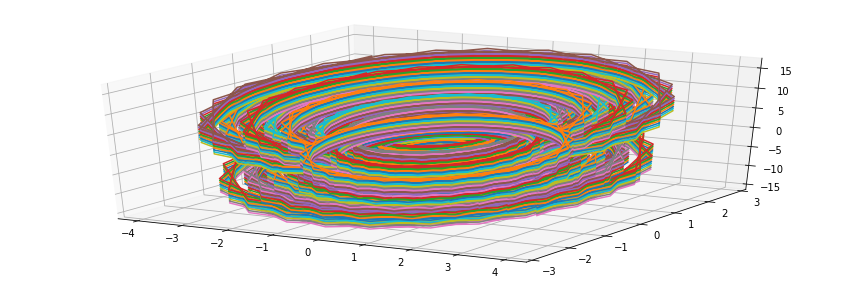

In [127]:
param_space = np.arange(-2, 2, 0.5)
param_list = []
for each_a in param_space:
    for each_b in param_space:
        for each_c in param_space:
            param_list.append({'param_a': each_a, 'param_b':each_b, 'param_c': each_c})
            
plt.figure(figsize=(15, 5))     
for i in range(len(param_list)):
    run = modelc(xinit=float(param_list[i]['param_a']), 
                  yinit=float(param_list[i]['param_b']), 
                  zinit=float(param_list[i]['param_c']), 
                  itr=30)
    ax = gca(projection='3d')
    ax.plot(run['xresults'], run['yresults'], run['zresults'])
plt.show()